<a href="https://colab.research.google.com/github/KimJisanER/Dacon/blob/main/22_03_24_abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install catboost
!pip install NGboost
import catboost as cb
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
import seaborn as sns

In [3]:
path = '/content/drive/MyDrive/Dacon/bogjog/'

train_dataset = pd.read_csv(path+'train.csv')
test_dataset = pd.read_csv(path+'test.csv')

In [4]:
train_dataset=train_dataset.drop(columns='id')
test_id=test_dataset['id']
test_dataset=test_dataset.drop(columns='id')

In [5]:
print(train_dataset.head())

  Gender  Lenght  Diameter  Height  Whole Weight  Shucked Weight  \
0      M   0.605     0.470   0.115        1.1140          0.3925   
1      I   0.430     0.315   0.095        0.3780          0.1750   
2      I   0.580     0.490   0.195        1.3165          0.5305   
3      M   0.535     0.405   0.175        1.2705          0.5480   
4      I   0.310     0.235   0.090        0.1270          0.0480   

   Viscra Weight  Shell Weight  Target  
0         0.2910        0.3100      15  
1         0.0800        0.1045       8  
2         0.2540        0.4100      18  
3         0.3265        0.3370      13  
4         0.0310        0.0400       6  


In [6]:
print(train_dataset['Gender'].value_counts())

M    469
I    404
F    380
Name: Gender, dtype: int64


In [7]:
print(test_dataset['Gender'].value_counts())

M    1059
I     938
F     927
Name: Gender, dtype: int64


In [8]:
print(train_dataset.describe())

            Lenght     Diameter       Height  Whole Weight  Shucked Weight  \
count  1253.000000  1253.000000  1253.000000   1253.000000     1253.000000   
mean      0.522869     0.406963     0.139545      0.831199        0.358818   
std       0.120231     0.099771     0.039033      0.500491        0.224612   
min       0.110000     0.090000     0.030000      0.008000        0.002500   
25%       0.445000     0.345000     0.115000      0.440500        0.182500   
50%       0.535000     0.420000     0.140000      0.777500        0.326000   
75%       0.615000     0.480000     0.165000      1.160000        0.505500   
max       0.780000     0.630000     0.250000      2.779500        1.488000   

       Viscra Weight  Shell Weight       Target  
count    1253.000000   1253.000000  1253.000000  
mean        0.181006      0.240077     9.912211  
std         0.111936      0.142574     3.214676  
min         0.002000      0.003000     3.000000  
25%         0.092500      0.130000     8.000000

In [9]:
print(test_dataset.describe())

            Lenght     Diameter       Height  Whole Weight  Shucked Weight  \
count  2924.000000  2924.000000  2924.000000   2924.000000     2924.000000   
mean      0.524473     0.408275     0.139504      0.827689        0.359603   
std       0.120051     0.099026     0.042975      0.486079        0.220856   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.455000     0.350000     0.115000      0.443375        0.188000   
50%       0.545000     0.425000     0.145000      0.805250        0.340500   
75%       0.615000     0.480000     0.165000      1.151125        0.501625   
max       0.815000     0.650000     1.130000      2.825500        1.351000   

       Viscra Weight  Shell Weight  
count    2924.000000   2924.000000  
mean        0.180417      0.238297  
std         0.108623      0.137754  
min         0.000500      0.001500  
25%         0.093500      0.130000  
50%         0.171500      0.235000  
75%         0.250500      0.325000  
m

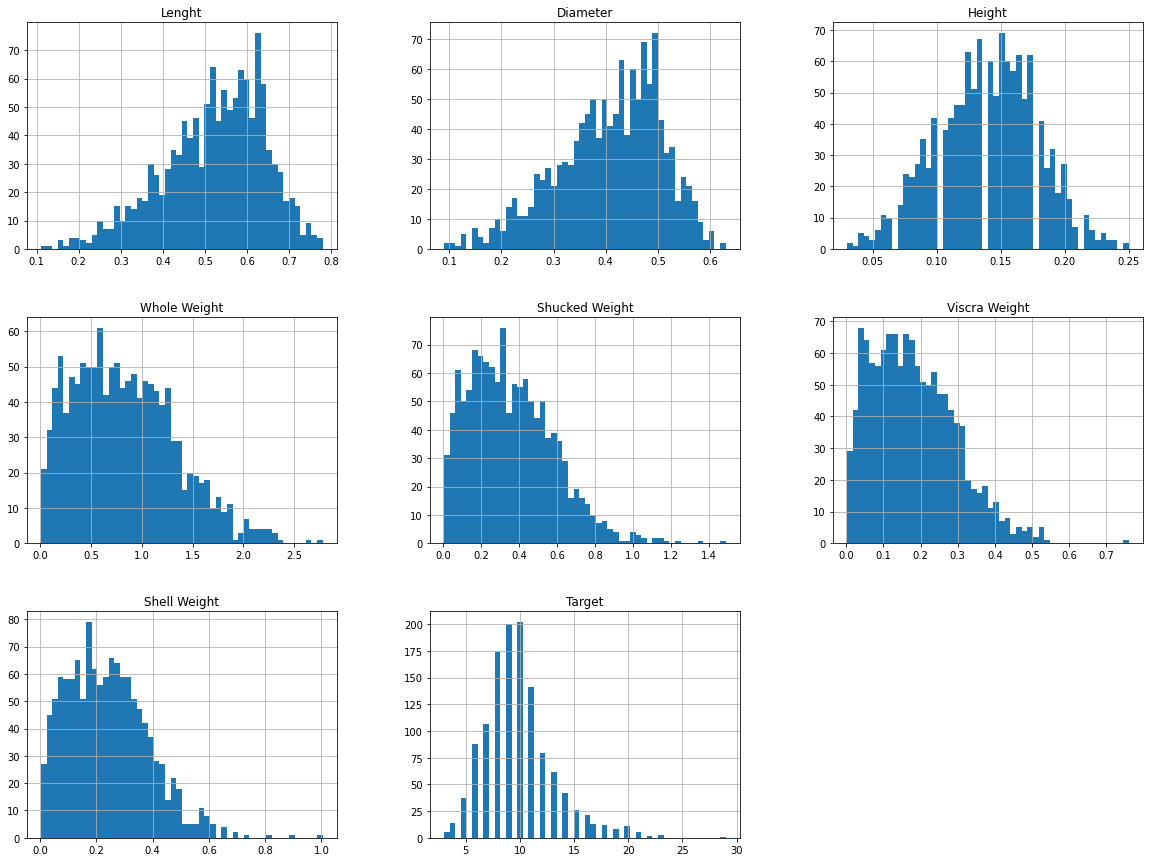

In [10]:
train_dataset.hist(bins=50,figsize=(20,15))
plt.show()

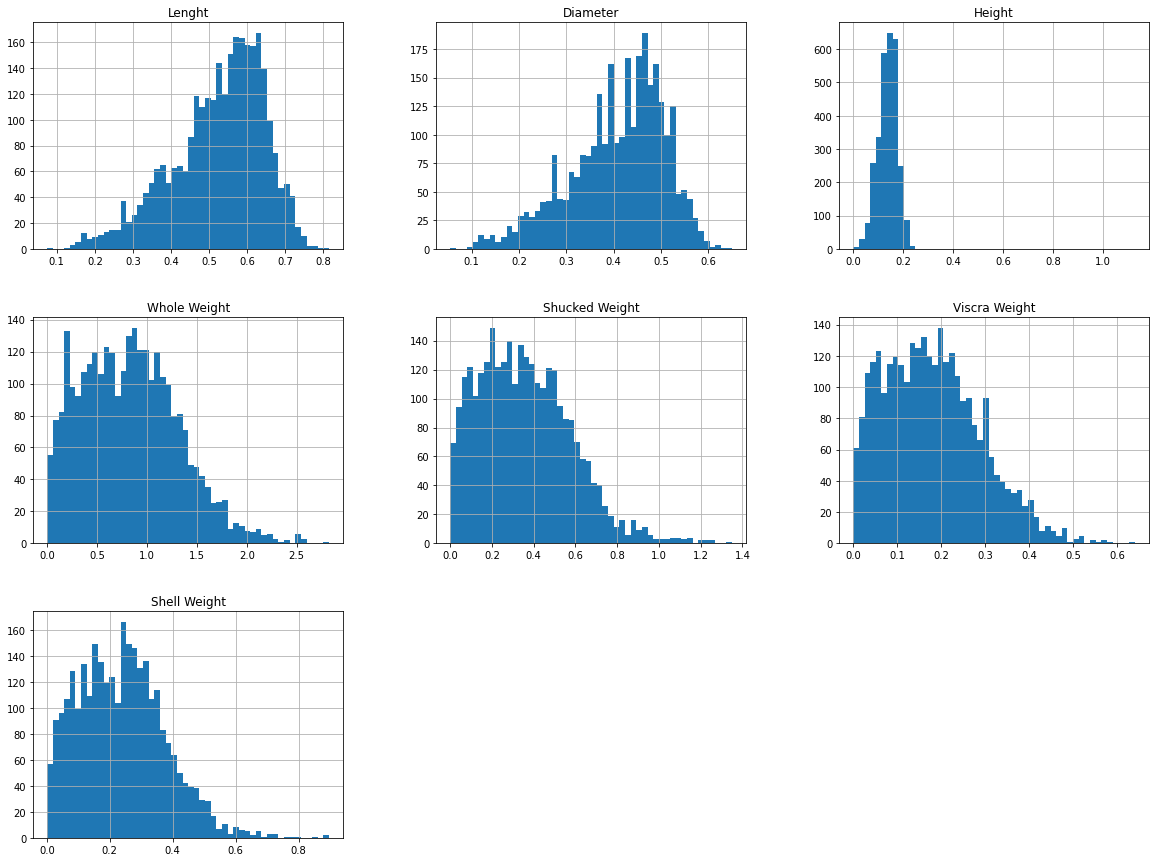

In [11]:
test_dataset.hist(bins=50,figsize=(20,15))
plt.show()

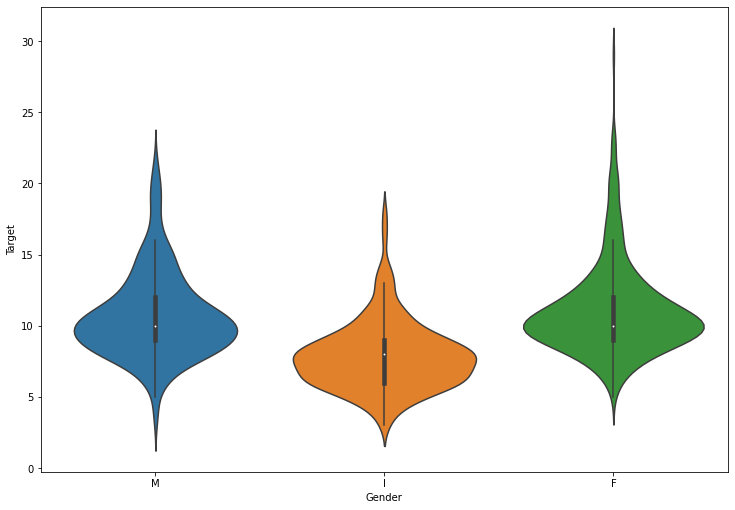

In [12]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,2)
plt.xlabel('Gender')
plt.ylabel('Target')
sns.violinplot(x= train_dataset['Gender'], y= train_dataset['Target'])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

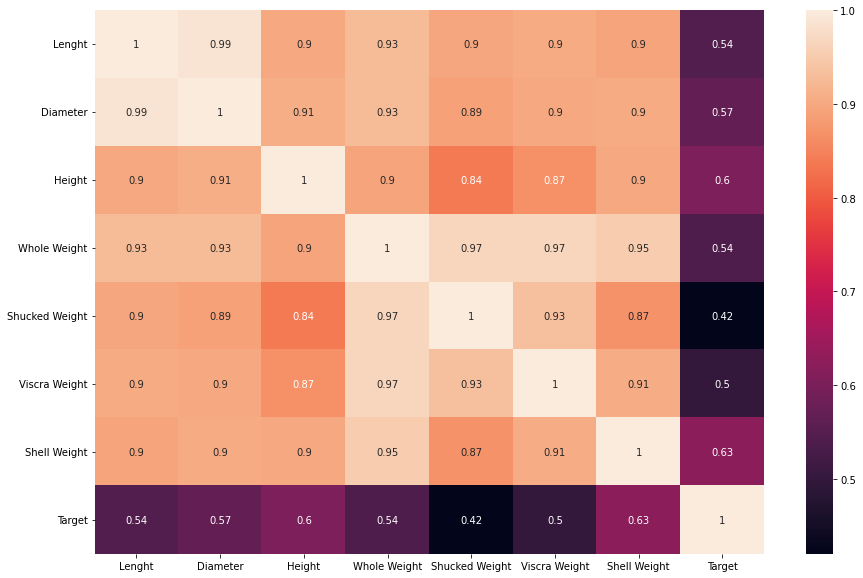

In [13]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(train_dataset.corr(), annot=True)
plt.show()

In [14]:
y_train=train_dataset['Target']
train_dataset=train_dataset.drop(columns='Target')
X_train=pd.get_dummies(train_dataset)
X_test=pd.get_dummies(test_dataset)

print(X_train.head())
print(X_test.head())

   Lenght  Diameter  Height  Whole Weight  Shucked Weight  Viscra Weight  \
0   0.605     0.470   0.115        1.1140          0.3925         0.2910   
1   0.430     0.315   0.095        0.3780          0.1750         0.0800   
2   0.580     0.490   0.195        1.3165          0.5305         0.2540   
3   0.535     0.405   0.175        1.2705          0.5480         0.3265   
4   0.310     0.235   0.090        0.1270          0.0480         0.0310   

   Shell Weight  Gender_F  Gender_I  Gender_M  
0        0.3100         0         0         1  
1        0.1045         0         1         0  
2        0.4100         0         1         0  
3        0.3370         0         0         1  
4        0.0400         0         1         0  
   Lenght  Diameter  Height  Whole Weight  Shucked Weight  Viscra Weight  \
0   0.595     0.470   0.155         1.121          0.4515         0.1780   
1   0.580     0.450   0.150         0.927          0.2760         0.1815   
2   0.260     0.205   0.070

In [15]:
num_folds= 10
seed = 7
scoring = 'neg_root_mean_squared_error'

models = []
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('EN',ElasticNet()))
models.append(('SVM',SVR()))
models.append(('RFR',RandomForestRegressor()))
models.append(('XGBR',XGBRegressor(max_depth=3,n_estimators=100,objective='reg:squarederror')))
models.append(('LGBMR',LGBMRegressor()))
models.append(('CatBR',CatBoostRegressor(max_depth=4, n_estimators=900, silent=True)))
models.append(('AdaR',AdaBoostRegressor()))
models.append(('Xtree',ExtraTreesRegressor(max_depth=8,n_estimators=900)))

results =[]
names = []
for name, model in models:
  kfold = KFold(n_splits=10,random_state=7,shuffle = True)
  cv_results = cross_val_score(model,X_train,y_train
                               ,cv= kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s : %f (%f) "%(name,-cv_results.mean(),cv_results.std())
  print(msg)

LR : 2.236371 (0.223749) 
LASSO : 3.212312 (0.171913) 
KNN : 2.368712 (0.229403) 
CART : 3.144293 (0.283322) 
EN : 3.068361 (0.176180) 
SVM : 2.427011 (0.223238) 
RFR : 2.271616 (0.208304) 
XGBR : 2.333296 (0.268979) 
LGBMR : 2.350277 (0.224048) 
CatBR : 2.318124 (0.265461) 
AdaR : 2.913889 (0.208507) 
Xtree : 2.257283 (0.235575) 


In [16]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)

model_cat=CatBoostRegressor(max_depth=4, n_estimators=900, silent=True)
model_cat.fit(X_train,y_train)

model_lr=LinearRegression()
model_lr.fit(X_train,y_train)

model_xt=ExtraTreesRegressor(max_depth=8,n_estimators=900)
model_xt.fit(X_train,y_train)

pred=model.predict(X_test)
pred2=model_cat.predict(X_test)
pred3=model_lr.predict(X_test)
pred4=model_xt.predict(X_test)

# pred_fin=np.expm1(pred)
pred_fin= (pred+pred2+pred3+pred4)/4
pred_fin=pd.DataFrame(pred_fin)
pred_fin.columns=['target']

In [17]:
sub=pd.concat([test_id,pred_fin], axis=1)
sub.columns=['id','target']
print(sub)

sub.to_csv('03_24_abalone.csv', index=False)

        id     target
0        1   9.408117
1        2  13.068031
2        3   5.627448
3        4  11.252424
4        5  10.150295
...    ...        ...
2919  2920   4.202997
2920  2921   7.218658
2921  2922   9.329719
2922  2923   9.247547
2923  2924  11.456523

[2924 rows x 2 columns]
